In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# not important after importing files

# to download 

!pip3 install https://github.com/Martlgap/face-alignment-mtcnn/releases/latest/download/face_alignment_mtcnn-0.3-py3-none-any.whl
!git clone https://github.com/Martlgap/face-alignment-mtcnn.git
%cd /content/face-alignment-mtcnn
%cd /content/face-alignment-mtcnn
!touch fgnet_mtcnn.py
!mkdir cropped_fgnet

In [ ]:
# not important after importing files
# to install tflite for mtcnn face allignment
!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!sudo apt-get update
!sudo apt-get install python3-tflite-runtime

In [ ]:
# not important after importing files
# for face cropping and allignment of fgnet dataset
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import facealignment
import os


img_dim = (224, 224)

df = pd.read_csv('/content/face-alignment-mtcnn/new_fgnet.csv', usecols= ['full_path','age'])

for i in range(1002):
  the_path, the_age = df.iloc[i]
  the_split = the_path.split("/")
  the_name = the_split[-1]
  print(the_name)
  final_path = "/" + str(the_path)
  single_face = cv2.imread(final_path)
  tool = facealignment.FaceAlignmentTools()
  # single_face = cv2.cvtColor(single_face, cv2.COLOR_BGR2RGB)

  try:
    aligned_img = tool.align(single_face)
    resized = cv2.resize(aligned_img, img_dim, interpolation = cv2.INTER_AREA)
    save_path = "./cropped_fgnet/" + str(the_name)
    os.chdir('/content/face-alignment-mtcnn/cropped_fgnet/')
    cv2.imwrite(the_name, resized)
    #plt.imshow(resized)
    #plt.axis('off')
    #plt.savefig(save_path, bbox_inches=0)

  except:
    print(i)


In [ ]:
# not important after importing files
# for face cropping and allignment of wiki_imdb dataset
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import facealignment
import os


img_dim = (224, 224)

df = pd.read_csv('/content/face-alignment-mtcnn/wiki.csv', usecols= ['full_path','age'])

for i in range(1002):
  the_path, the_age = df.iloc[i]
  the_split = the_path.split("/")
  the_name = the_split[-1]
  print(the_name)
  final_path = "/" + str(the_path)
  single_face = cv2.imread(final_path)
  tool = facealignment.FaceAlignmentTools()
  # single_face = cv2.cvtColor(single_face, cv2.COLOR_BGR2RGB)

  try:
    aligned_img = tool.align(single_face)
    resized = cv2.resize(aligned_img, img_dim, interpolation = cv2.INTER_AREA)
    save_path = "./cropped_wiki/" + str(the_name)
    os.chdir('/content/face-alignment-mtcnn/cropped_wiki/')
    cv2.imwrite(the_name, resized)
    #plt.imshow(resized)
    #plt.axis('off')
    #plt.savefig(save_path, bbox_inches=0)

  except:
    print(i)


In [ ]:
# not important after loading files
# fgnet age grouping

import pandas as pd


df = pd.read_csv('/content/fgnet.csv')
ages = df['age']
age_group_array = np.zeros(len(ages))

def age_group(age):
    if age >=0 and age <=2:
        return 0
    elif age >2 and age <=5:
        return 1
    elif age >5 and age <=13:
        return 2
    elif age >13 and age <=18:
        return 3
    elif age >18 and age <=24:
        return 4
    elif age >24 and age <=33:
        return 5
    elif age >33 and age <=48:
        return 6
    elif age >48 and age <=64:
        return 7
    else:
        return 8


for i in range(len(ages)):
  the_act_age = ages[i]
  #print(the_act_age)
  final_age_group = age_group(the_act_age)
  age_group_array[i] = final_age_group

as_int = age_group_array.astype(int)
as_string = as_int.astype(str)
df["age_groups"] = as_string
df.to_csv("fgnet_with_age_groups.csv", index=False)

#print(age_group_array)
#print(ages)

In [ ]:
# not important after loading files
# wiki age grouping

import pandas as pd


df = pd.read_csv('/content/wiki.csv')
ages = df['age']
age_group_array = np.zeros(len(ages))

def age_group(age):
    if age >=0 and age <=2:
        return 0
    elif age >2 and age <=5:
        return 1
    elif age >5 and age <=13:
        return 2
    elif age >13 and age <=18:
        return 3
    elif age >18 and age <=24:
        return 4
    elif age >24 and age <=33:
        return 5
    elif age >33 and age <=48:
        return 6
    elif age >48 and age <=64:
        return 7
    else:
        return 8


for i in range(len(ages)):
  the_act_age = ages[i]
  #print(the_act_age)
  final_age_group = age_group(the_act_age)
  age_group_array[i] = final_age_group

as_int = age_group_array.astype(int)
as_string = as_int.astype(str)
df["age_groups"] = as_string
df.to_csv("fgnet_with_age_groups.csv", index=False)

#print(age_group_array)
#print(ages)

In [ ]:
# not important after importing files
# make fgnet csv file

from glob import glob
import pandas as pd
import re

final_labels = []

df = pd.read_csv('/content/fgnet_age__gender_true_label.csv')

# ages = df['age']
full_paths = df['full_path']
age_groups = df['age_groups']
genders = df['gender']


for i in range(len(full_paths)):
  final_string = ''
  gender_string = ''
  if genders[i] == 0:
    gender_string = 'female'
  else:
    gender_string = 'male'
  mid_string = 'age_group: ' + str(age_groups[i]) + ' ' + 'gender: ' + gender_string
  final_string = mid_string
  final_labels.append(final_string)
  

df['final_label'] = final_labels
df.to_csv('fgnet_final_file.csv', columns=['full_path','age', 'age_groups', 'gender','true_label','final_label'], index=False)


In [ ]:
# not important after importing files
# make wiki csv file

from glob import glob
import pandas as pd
import re

final_labels = []

df = pd.read_csv('/content/fgnet_age__gender_true_label.csv')

# ages = df['age']
full_paths = df['full_path']
age_groups = df['age_groups']
genders = df['gender']


for i in range(len(full_paths)):
  final_string = ''
  gender_string = ''
  if genders[i] == 0:
    gender_string = 'female'
  else:
    gender_string = 'male'
  mid_string = 'age_group: ' + str(age_groups[i]) + ' ' + 'gender: ' + gender_string
  final_string = mid_string
  final_labels.append(final_string)
  

df['final_label'] = final_labels
df.to_csv('wiki_final_file.csv', columns=['full_path','age', 'age_groups', 'gender','true_label','final_label'], index=False)


In [ ]:
# not important after importing files
# make wiki utk combined csv file
from numpy.core.numeric import full
import pandas as pd


df_wiki = pd.read_csv('/content/wiki_final_file.csv')
df_utk = pd.read_csv('/content/utk_final.csv')

init_utk_path = '/content/resized_utk_face/'

full_paths = []
ages = []
age_groups = []
gender = []
final_label = []

wiki_paths = df_wiki['full_path']
wiki_ages = df_wiki['age']
wiki_age_groups = df_wiki['age_groups']
wiki_genders = df_wiki['gender']
wiki_labels = df_wiki['final_label']

utk_paths = df_utk['full_path']
utk_ages = df_utk['age']
utk_age_groups = df_utk['age_groups']
utk_genders = df_utk['gender']
utk_labels = df_utk['final_label']


full_paths.extend(wiki_paths)
full_paths.extend(utk_paths)
ages.extend(wiki_ages)
ages.extend(utk_ages)
age_groups.extend(wiki_age_groups)
age_groups.extend(utk_age_groups)
gender.extend(wiki_genders)
gender.extend(utk_genders)
final_label.extend(wiki_labels)
final_label.extend(utk_labels)

dict = {'full_path': full_paths, 'age': ages, 'age_groups': age_groups, 'gender': gender, 'final_label': final_label}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('wiki_utk_final.csv') 

# print(full_paths[1:10])

In [ ]:
# copying important files from drive
!cp /content/drive/MyDrive/fgnet_final_file.csv /content/
!cp /content/drive/MyDrive/wiki_final_file.csv /content/
!cp /content/drive/MyDrive/wiki_model.h5 /content/
!cp /content/drive/MyDrive/wiki_final_cropped.zip /content
!unzip /content/wiki_final_cropped.zip
!mv  /content/content/wiki_final_cropped /content
!rm -r /content/content
!cp /content/drive/MyDrive/cropped_fgnet_latest.zip /content
!unzip /content/cropped_fgnet_latest.zip
!cp /content/drive/MyDrive/utk_face.zip /content
!unzip /content/utk_face.zip
!mv /content/content/resized_utk_face /content
!rm -r /content/content
!cp /content/drive/MyDrive/utk_final.csv /content
!cp /content/drive/MyDrive/wiki_utk_final.csv /content

In [ ]:
!cp /content/wiki_utk_final.csv /content/drive/MyDrive

In [ ]:
!cp /content/all_datasets_with_csv.zip /content/drive/MyDrive

In [ ]:
# wiki data generator for vgg16 model

from keras_preprocessing.image import ImageDataGenerator
import pandas as pd

# datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

train_df = pd.read_csv('/content/utk_final.csv') # for fgnet "/content/fgnet_with_age_groups.csv" 
train_df['final_label'] = train_df['final_label'].astype(str)
test_df = pd.read_csv('/content/fgnet_final_file.csv') # for fgnet "/content/fgnet_with_age_groups.csv" 
test_df['final_label'] = test_df['final_label'].astype(str)

# train_df['age_group'] = train_df['age_group'].astype(str)
# train_df['gender'] = train_df['gender'].astype(str)

# y_coll = ['age_group', 'gender']

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.25
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="full_path",
    y_col="final_label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",  
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="full_path",
    y_col="final_label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory="/content/cropped_fgnet/",
x_col="full_path",
y_col=None,
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))


Found 17781 validated image filenames belonging to 18 classes.
Found 5927 validated image filenames belonging to 18 classes.
Found 947 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 56 invalid image filename(s) in x_col="full_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
# to load previous saved model
from tensorflow import keras
model = keras.models.load_model('/content/wiki_model.h5')

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow import keras

df = pd.read_csv('/content/fgnet_final_file.csv')


full_path = df['full_path']
labels = df['true_label']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

base_dir = '/content/cropped_fgnet/'

pred_list = []
test_list = []


loop_num = 0
loop_range = 900      # all = 946

for path in full_path:
  final_dir = base_dir + path
  try:
    the_image = Image.open(final_dir)  # change number her to get diff prediction
  except:
      print(loop_num)
  the_image_array = np.array(the_image)
  new_shape = np.reshape(the_image_array, (1, 224, 224, 3))
  # plt.imshow(the_image)
  # plt.show()
  #print(neigh.predict(intermediate_output))
  the_pred = model.predict(new_shape)
  #print(loop_num)
  pred_list.append(the_pred)
  test_list.append(labels[loop_num])
  loop_num += 1
  if loop_num > loop_range:
    break

In [ ]:
# for reshaping labels according to model prediction for MSE calculations
import numpy as np

final_true_labels = []

for num_list in test_list:
  mynewlist = [s for s in num_list if s.isdigit()]
  inter_label = np.zeros(18).astype(int)
  num_counter = 0
  int_checker = mynewlist[-1]
  if int(mynewlist[-1]) == 1:
    num_counter = num_counter + 9
  for num in range(9):
    if int(mynewlist[num]) == 1:
      inter_label[num_counter] = 1
      final_true_labels.append(inter_label)
    num_counter += 1


In [ ]:
# MSE calculation for model trained no wiki-imdb
from tensorflow.keras.losses import MeanSquaredError
mse = MeanSquaredError()
the_mse = mse(final_true_labels, pred_list)
print(the_mse)

tf.Tensor(0.100529015, shape=(), dtype=float32)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4000)              100356000 
                                                                 
 dropout_1 (Dropout)         (None, 4000)              0         
                                                                 
 dense_4 (Dense)             (None, 200)               800200    
                                                                 
 dense_5 (Dense)             (None, 18)                3618      
                                                                 
Total params: 115,874,506
Trainable params: 101,159,81

In [ ]:
# evaluate model on fgnet dataset
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
results = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_TEST)
print("test loss, test acc:", results)
# print(len(results))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test loss, test acc: [1.5853495597839355, 0.4029019773006439]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(4000, activation='relu')
dense_layer_2 = layers.Dense(200, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(18, activation='softmax')


wiki_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout,
    dense_layer_2,
    dropout,
    prediction_layer
])

In [ ]:
wiki_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4000)              100356000 
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_4 (Dense)             (None, 200)               800200    
                                                                 
 dense_5 (Dense)             (None, 18)                3618      
                                                                 
Total params: 115,874,506
Trainable params: 114,139,01

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(     # use model name wiki_model to train from scratch
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history  = model.fit(train_generator, # use model name wiki_model to train from scratch
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5, callbacks=[es])




Epoch 1/5
555/555 [==============================] - 124s 222ms/step - loss: 1.7027 - accuracy: 0.3919 - val_loss: 1.6588 - val_accuracy: 0.4046
Epoch 2/5
555/555 [==============================] - 124s 223ms/step - loss: 1.6697 - accuracy: 0.3961 - val_loss: 1.6641 - val_accuracy: 0.3811
Epoch 3/5
555/555 [==============================] - 124s 224ms/step - loss: 1.6360 - accuracy: 0.4051 - val_loss: 1.6485 - val_accuracy: 0.3959
Epoch 4/5
555/555 [==============================] - 125s 225ms/step - loss: 1.6046 - accuracy: 0.4125 - val_loss: 1.6061 - val_accuracy: 0.4377
Epoch 5/5
555/555 [==============================] - 125s 224ms/step - loss: 1.5767 - accuracy: 0.4200 - val_loss: 1.5852 - val_accuracy: 0.4032


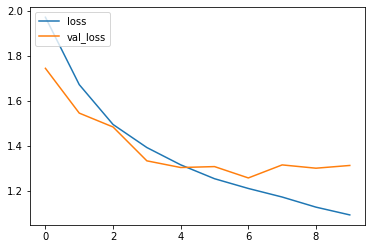

In [ ]:
# results from wiki-imdb dataset
import matplotlib.pyplot as plt
# training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

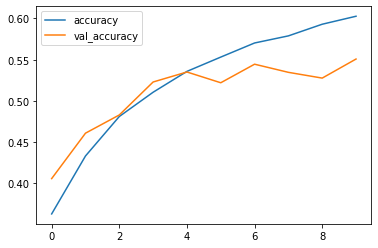

In [ ]:
# results from wiki-imdb dataset
# training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

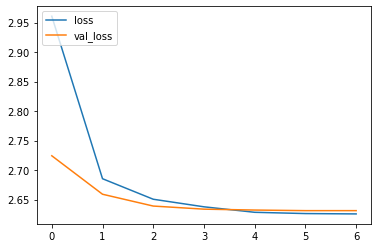

In [ ]:
# results from utk dataset
import matplotlib.pyplot as plt
# training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

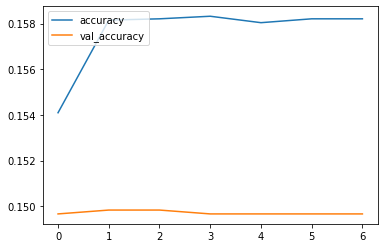

In [ ]:
# results from utk dataset
# training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

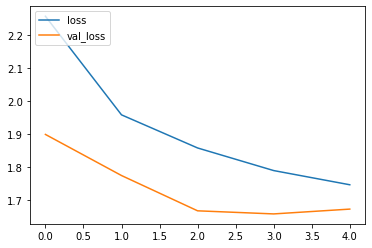

In [ ]:
# pretrained on wiki, fine tuned utk
import matplotlib.pyplot as plt
# training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

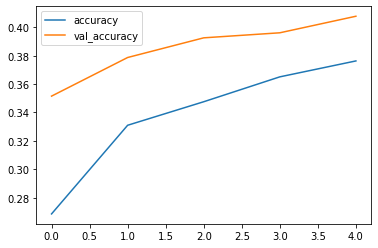

In [ ]:
# pretrained on wiki, fine tuned utk
# training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [ ]:
###############################################################################
# for fgnet fine_tuning 

In [ ]:
# utk data generator for vgg16 model pretrained on 

from keras_preprocessing.image import ImageDataGenerator
import pandas as pd

# datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

train_df = pd.read_csv('/content/utk_final.csv') # for fgnet "/content/fgnet_with_age_groups.csv" 
train_df['final_label'] = train_df['final_label'].astype(str)
# train_df['age_group'] = train_df['age_group'].astype(str)
# train_df['gender'] = train_df['gender'].astype(str)

# y_coll = ['age_group', 'gender']

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    validation_split=0.25
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="/content/resized_utk_face/",
    x_col="full_path",
    y_col="final_label",
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",  
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="/content/resized_utk_face/",
    x_col="full_path",
    y_col="final_label",
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)


Found 17781 validated image filenames belonging to 18 classes.
Found 5927 validated image filenames belonging to 18 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(     # use model name wiki_model to train from scratch
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history  = model.fit(train_generator, # use model name wiki_model to train from scratch
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=20, callbacks=[es])


Epoch 1/20
1111/1111 [==============================] - 148s 131ms/step - loss: 2.2202 - accuracy: 0.2794 - val_loss: 1.9052 - val_accuracy: 0.3608
Epoch 2/20
1111/1111 [==============================] - 144s 129ms/step - loss: 1.9343 - accuracy: 0.3330 - val_loss: 1.7284 - val_accuracy: 0.3831
Epoch 3/20
1111/1111 [==============================] - 144s 130ms/step - loss: 1.8460 - accuracy: 0.3479 - val_loss: 1.6941 - val_accuracy: 0.4041
Epoch 4/20
1111/1111 [==============================] - 144s 129ms/step - loss: 1.7774 - accuracy: 0.3585 - val_loss: 1.6214 - val_accuracy: 0.4162
Epoch 5/20
1111/1111 [==============================] - 144s 129ms/step - loss: 1.7266 - accuracy: 0.3735 - val_loss: 1.6526 - val_accuracy: 0.3995
Epoch 6/20
1111/1111 [==============================] - 144s 129ms/step - loss: 1.6965 - accuracy: 0.3859 - val_loss: 1.6418 - val_accuracy: 0.4152
Epoch 7/20
1111/1111 [==============================] - 144s 129ms/step - loss: 1.6963 - accuracy: 0.3886 - val_

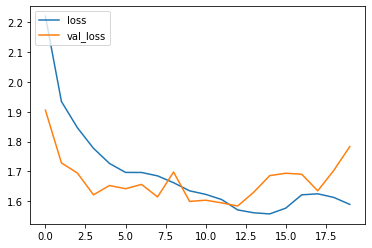

In [ ]:
import matplotlib.pyplot as plt
# training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

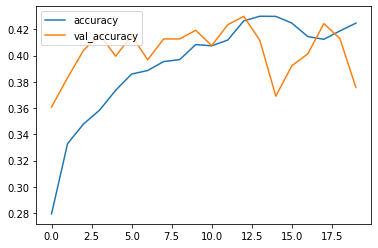

In [ ]:
# training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [ ]:
for i, layer in enumerate(model.layers): # naming layers to get intermediate output
  layer._name = 'layer_' + str(i)

In [ ]:
# extracting features from second last layer

import pandas as pd
import numpy as np
from PIL import Image
from tensorflow import keras

df = pd.read_csv('/content/wiki_final_file.csv')

path_list = []
feature_list = []
label_list = []

layer_name = 'layer_4'

full_path = df['full_path']
labels = df['age']    # 'true_label'


for i in range(1000): # adjust number according to dataset size or use 'len(full_path)' to run on all dataset
  the_image = Image.open(full_path[i])
  the_image_array = np.array(the_image)
  new_shape = np.reshape(the_image_array, (1, 224, 224, 3))
  prediction = model.predict(new_shape)
  intermediate_layer_model = keras.Model(inputs=model.input,
                                        outputs=model.get_layer(layer_name).output)

  intermediate_output = intermediate_layer_model(new_shape)
  final_inter_output = np.reshape(intermediate_output,(200))
  path_list.append(full_path[i])
  label_list.append(labels[i])
  feature_list.append(final_inter_output)
  #print(i)



In [ ]:
# training knn classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


arr_1 = np.array(feature_list)
arr_2 = np.array(label_list)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(feature_list, label_list)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow import keras

df = pd.read_csv('/content/fgnet_final_file.csv')


full_path = df['full_path']
labels = df['age']      # 'true_label'

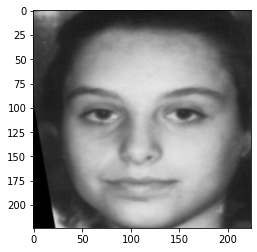

Age: [28]


In [ ]:
import matplotlib.pyplot as plt


base_dir = '/content/cropped_fgnet/'

path = full_path[19]

final_dir = base_dir + path
try:
  the_image = Image.open(final_dir)  # change number her to get diff prediction
except:
    print(loop_num)
the_image_array = np.array(the_image)
new_shape = np.reshape(the_image_array, (1, 224, 224, 3))
intermediate_output = intermediate_layer_model(new_shape)
plt.imshow(the_image)
plt.show()
the_age_pred = neigh.predict(intermediate_output)
final_str = 'Age: ' + str(the_age_pred)
print(final_str)

In [ ]:
!python

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> exit()
